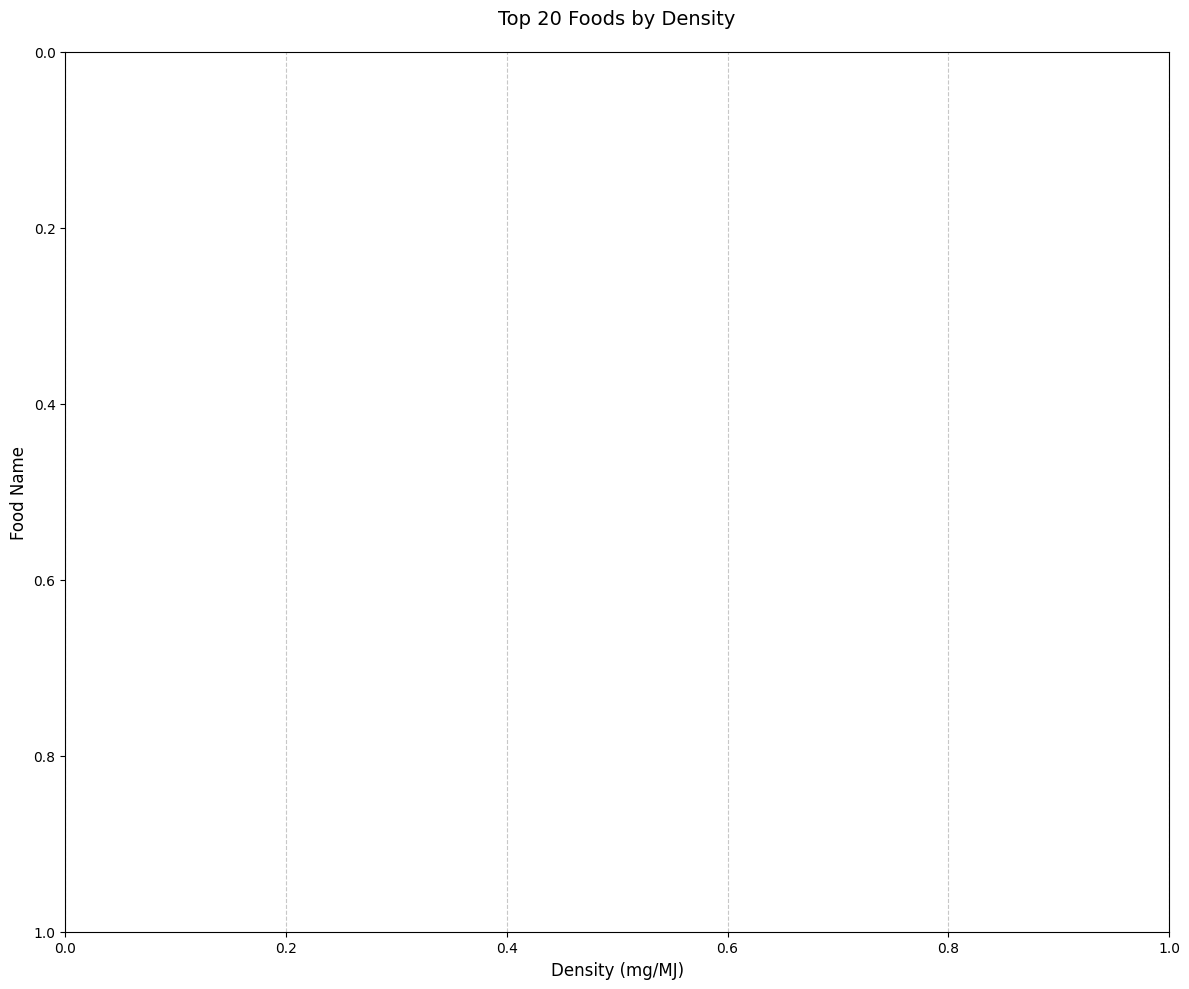

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('data/purine.csv')

# Sort the DataFrame by the 'density' column in descending order
df_sorted = df.sort_values(by='density', ascending=False)

# Take top 20 items for better visibility
df_top20 = df_sorted.head(20)

# Create the plot with larger figure size
plt.figure(figsize=(12, 10))

# Create horizontal bar plot
plt.barh(df_top40['foodname'], df_top40['density'], color='skyblue')

# Customize the plot
plt.xlabel('Density (mg/MJ)', fontsize=12)
plt.ylabel('Food Name', fontsize=12)
plt.title('Top 20 Foods by Density', fontsize=14, pad=20)

# Adjust y-axis labels for better readability
plt.yticks(fontsize=10)

# Add more space for labels
plt.subplots_adjust(left=0.4)  # Increase left margin for food names

# Invert y-axis to have the highest density at the top
plt.gca().invert_yaxis()

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()